# Kaggle Competition Digit Recognizer

# All Imports

In [1]:
import tensorflow as tf
import keras

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.utils import to_categorical, np_utils

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


# Tensor Flow Model 1

#### Load Train Dataset

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
# Set X and Y
y = pd.get_dummies(df['label'])
X = df.drop('label', axis=1).values

# Split X and Y into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scale X train and test down by dividing 255
X_train = X_train/255
X_test = X_test/255

In [4]:
# Instantiate and reset graph
tf.reset_default_graph()

# Create placeholder for X and Y (input layer)
X = tf.placeholder(dtype=tf.float32,# specify the datatype
                   shape=(None,
                          X_train.shape[1]), 
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')

# Hidden Layers
hidden1 = tf.layers.dense(X,
                          units=X_train.shape[1], # units = how many nodes
                          name='hidden1',
                          activation=tf.nn.relu) # Use relu for activation
hidden2 = tf.layers.dense(hidden1,
                          units=X_train.shape[1], # Second hidden layer
                          name='hidden2',
                          activation=tf.nn.relu)

y_hat = tf.layers.dense(hidden1,
                        units=y_train.shape[1],
                        activation=None)

loss = tf.losses.softmax_cross_entropy(y, y_hat) # loss function using softmax, Converts values into 0 and 1

optimizer = tf.train.AdamOptimizer(learning_rate=0.01) # optimize model by using Adam with learning rate 0.01

training_op = optimizer.minimize(loss) # Reduce error

#saver = tf.train.Saver

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [5]:
# Do this before fitting the model
init = tf.global_variables_initializer()

test_error = []
train_error = []

with tf.Session() as sess: # start fitting the model
    init.run()
    
    for epoch in range(50):
        sess.run(training_op,
                 feed_dict={X:X_train, y:y_train}) # tensorflow way of passing x and y
        
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train}) # Set train loss function
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test}) # Set test loss function
        train_error.append(train_loss) # store the results into train_loss list
        test_error.append(test_loss) # store the results into test_loss list
        
        if epoch % 10 == 0: 
            print("Epoch:", epoch+1, train_loss, test_loss)
            
    pred = sess.run(y_hat, feed_dict={X:X_test})

Epoch: 1 1.0250586 1.046153
Epoch: 11 0.40596274 0.40921506
Epoch: 21 0.20474696 0.21951492
Epoch: 31 0.14102401 0.16675265
Epoch: 41 0.097090706 0.1305811


In [6]:
class_preds = np.empty(pred.shape[0], dtype=np.int32)

for i,clas in enumerate(map(np.argmax, pred)):
    class_preds[i] = clas
    
class_preds

array([8, 2, 6, ..., 7, 4, 5], dtype=int32)

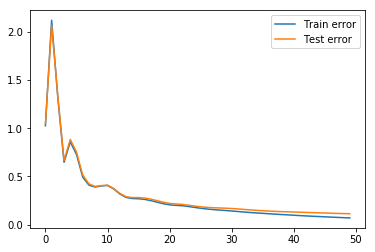

In [10]:
plt.plot(train_error, label='Train error')
plt.plot(test_error, label='Test error')
plt.legend()

Based on this graph, it is ideal to stop the training at epoch 40 because thats where the error for train and test starts to create gaps in between.

# Keras Model 1

In [12]:
df = pd.read_csv('./train.csv')

In [13]:
y = df['label']
X = df.drop('label', axis=1).values

# Split X and Y into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scale X train and test down by dividing 255
X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
model1 = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input
n_output = y_train.shape[1]

# 1st hidden layer
model1.add(Dense(n_hidden,
                input_dim=n_input,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.001)))
# 2nd hidden layer
model1.add(Dense(n_hidden,
                activation='relu'))

model1.add(Dense(n_output,
                activation='softmax'))

In [15]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
history = model1.fit(X_train,
                    y_train, 
                    validation_data=(X_test, y_test),
                    epochs=15,
                    batch_size=None,
                    verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/15
31500/31500 [==============================] - 21s 682us/step - loss: 0.1437 - acc: 0.9780 - val_loss: 0.1939 - val_acc: 0.9624
Epoch 2/15
31500/31500 [==============================] - 22s 689us/step - loss: 0.1336 - acc: 0.9795 - val_loss: 0.1954 - val_acc: 0.9646
Epoch 3/15
31500/31500 [==============================] - 21s 681us/step - loss: 0.1298 - acc: 0.9805 - val_loss: 0.1679 - val_acc: 0.9735
Epoch 4/15
31500/31500 [==============================] - 21s 674us/step - loss: 0.1226 - acc: 0.9820 - val_loss: 0.1576 - val_acc: 0.9740
Epoch 5/15
31500/31500 [==============================] - 22s 684us/step - loss: 0.1165 - acc: 0.9830 - val_loss: 0.1904 - val_acc: 0.9656
Epoch 6/15
31500/31500 [==============================] - 21s 681us/step - loss: 0.1143 - acc: 0.9842 - val_loss: 0.1754 - val_acc: 0.9683
Epoch 7/15
31500/31500 [==============================] - 21s 666us/step - loss: 0.1100 - acc: 0.9844 - val_loss: 0.

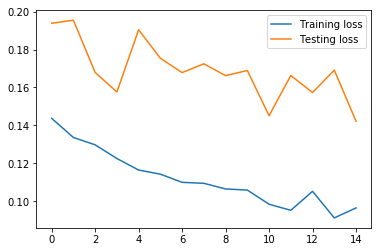

In [18]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

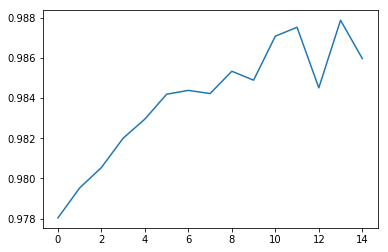

In [19]:
plt.plot(history.history['acc'])

In [20]:
keras1_pred = model1.predict(np.array(X_test))
keras1_pred

array([[5.2393854e-15, 2.6584791e-12, 3.2071311e-11, ..., 1.0000000e+00,
        6.4967351e-15, 3.0351072e-11],
       [1.7709424e-12, 3.3131458e-09, 3.1341216e-08, ..., 1.0000000e+00,
        1.3845177e-11, 3.5328424e-10],
       [4.8243605e-14, 3.5904609e-08, 8.6283271e-06, ..., 2.0367252e-06,
        2.0283958e-08, 2.2767739e-07],
       ...,
       [4.1134567e-16, 4.7718390e-16, 2.3578843e-15, ..., 1.1592236e-15,
        7.1273520e-10, 1.6387190e-08],
       [1.1063966e-07, 7.5174976e-06, 6.0808745e-08, ..., 4.2709367e-08,
        3.3711339e-03, 1.9609599e-01],
       [5.3000736e-15, 7.7753633e-08, 2.0904676e-09, ..., 3.2105980e-09,
        5.2228508e-08, 4.1957817e-12]], dtype=float32)

# Keras Model 2 (Early Stop)

In [22]:
df = pd.read_csv('./train.csv')

In [23]:
y = df['label']
X = df.drop('label', axis=1).values

# Split X and Y into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scale X train and test down by dividing 255
X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
model2 = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input
n_output = y_train.shape[1]

# 1st hidden layer
model2.add(Dense(n_hidden,
                input_dim=n_input,
                activation='relu'))
# 2nd hidden layer
model2.add(Dense(n_hidden,
                activation='relu'))
# Output
model2.add(Dense(n_output,
                activation='softmax'))

# Compile model
model2.compile(loss='categorical_crossentropy',
               optimizer='adam')
# Early Stop
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=0,
                           verbose=1,
                           mode='auto')

callbacks_list = [early_stop]

history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), 
                        epochs=15, batch_size=None,
                        callbacks = callbacks_list)

Train on 31500 samples, validate on 10500 samples
Epoch 1/15
31500/31500 [==============================] - 18s 569us/step - loss: 0.2289 - val_loss: 0.1196
Epoch 2/15
31500/31500 [==============================] - 16s 511us/step - loss: 0.0938 - val_loss: 0.1068
Epoch 3/15
31500/31500 [==============================] - 17s 553us/step - loss: 0.0658 - val_loss: 0.1108
Epoch 00003: early stopping


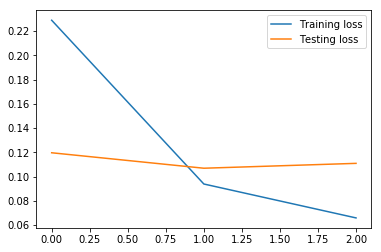

In [26]:
train_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']
plt.plot(train_loss2, label='Training loss')
plt.plot(test_loss2, label='Testing loss')
plt.legend()

In [27]:
keras2_pred = model2.predict(np.array(X_test))
keras2_pred

array([[9.9999976e-01, 1.1570298e-12, 2.4897631e-07, ..., 3.2829004e-09,
        1.7574604e-10, 7.1712662e-09],
       [1.8996749e-07, 6.2348386e-07, 1.0846249e-07, ..., 9.9962425e-01,
        6.2890834e-08, 3.4828641e-04],
       [9.3884438e-09, 1.7475098e-09, 2.3973810e-09, ..., 1.2135283e-08,
        4.1270059e-06, 7.0259330e-06],
       ...,
       [7.3795405e-08, 1.6349744e-05, 6.4028841e-06, ..., 1.2054130e-07,
        9.9994957e-01, 3.7084959e-07],
       [7.0805717e-10, 1.0001022e-10, 3.4537535e-09, ..., 3.5458248e-05,
        1.3971131e-08, 9.9995661e-01],
       [1.3397176e-12, 2.0954902e-08, 6.5718679e-09, ..., 8.2195610e-09,
        2.8822351e-09, 9.9010443e-08]], dtype=float32)

# Convolutional Neural Net Using Keras

In [29]:
df = pd.read_csv('./train.csv')

In [30]:
y = df['label']
X = df.drop('label', axis=1).values

# Split X and Y into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scale X train and test down by dividing 255
X_train = (X_train.reshape(X_train.shape[0], 28, 28, 1))/255
X_test = (X_test.reshape(X_test.shape[0], 28, 28, 1))/255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [31]:
cnn_model = Sequential()

# Set 1st convolution layer
cnn_model.add(Convolution2D(filters=6,
                        kernel_size=3,
                        activation='relu',
                        input_shape=(28, 28, 1)))
# Set 1st max pool to condense by f=2,s=2
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Set 2nd convolution layer
cnn_model.add(Convolution2D(filters=16, 
                        kernel_size=3,
                        activation='relu'))
# Set 2nd max pool f=2, s=2
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Drop 25% of the nodes
cnn_model.add(Dropout(0.25))

# Flatten the model
cnn_model.add(Flatten())

In [32]:
# Add layer using relu
cnn_model.add(Dense(128,
                activation='relu'))
# Drop 25% of the nodes again
cnn_model.add(Dropout(.25))

# Final output layer usong softmax for multi categorical
cnn_model.add(Dense(10,
                activation='softmax'))

In [33]:
# Compile the model
cnn_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
# Fit model on training data
cnn_model.fit(X_train,
          Y_train,
          batch_size=32,
          epochs=10,
          verbose=1)

Epoch 1/10
31500/31500 [==============================] - 8s 241us/step - loss: 0.4020 - acc: 0.8737
Epoch 2/10
31500/31500 [==============================] - 7s 238us/step - loss: 0.1489 - acc: 0.9532
Epoch 3/10
31500/31500 [==============================] - 8s 248us/step - loss: 0.1129 - acc: 0.9645
Epoch 4/10
31500/31500 [==============================] - 7s 224us/step - loss: 0.0911 - acc: 0.9713
Epoch 5/10
31500/31500 [==============================] - 7s 226us/step - loss: 0.0809 - acc: 0.9746
Epoch 6/10
31500/31500 [==============================] - 7s 226us/step - loss: 0.0732 - acc: 0.9771
Epoch 7/10
31500/31500 [==============================] - 7s 224us/step - loss: 0.0644 - acc: 0.9790
Epoch 8/10
31500/31500 [==============================] - 7s 228us/step - loss: 0.0597 - acc: 0.9798
Epoch 9/10
31500/31500 [==============================] - 7s 236us/step - loss: 0.0570 - acc: 0.9816
Epoch 10/10
31500/31500 [==============================] - 7s 223us/step - loss: 0.0512 - a

In [35]:
# Evaluate model on test data
score = cnn_model.evaluate(X_test, Y_test, verbose=0)
labels = cnn_model.metrics_names

print(str(labels[0]) + ": " + str(score[0]))
print(str(labels[1]) + ": " + str(score[1]))

loss: 0.03531139344584552
acc: 0.9896190476190476


In [40]:
cnn_pred = cnn_model.predict(np.array(X_test))
cnn_pred

array([[2.2342290e-06, 9.9963534e-01, 1.7090346e-05, ..., 4.4861659e-05,
        2.3835291e-04, 4.5226709e-05],
       [1.0805488e-09, 2.5120887e-08, 1.0686314e-05, ..., 9.9998558e-01,
        1.5445843e-10, 2.5453512e-06],
       [2.0102323e-14, 2.4120823e-09, 7.0101237e-11, ..., 1.5747295e-09,
        3.9299275e-09, 1.6577162e-07],
       ...,
       [2.3513588e-10, 2.3001276e-08, 1.0294143e-05, ..., 5.1023885e-10,
        9.9998939e-01, 9.1743381e-08],
       [3.3239933e-10, 2.5841274e-09, 3.5539870e-08, ..., 3.7649963e-07,
        1.5410493e-06, 9.9915171e-01],
       [9.1890210e-16, 6.0913674e-09, 2.1307676e-09, ..., 6.6644523e-11,
        4.7134202e-10, 1.1861356e-10]], dtype=float32)

# Prediction Using Test.CSV

In [41]:
test = pd.read_csv('./test.csv')

In [42]:
test = test.values

In [43]:
test = test.reshape(test.shape[0], 28, 28, 1)

In [46]:
real_pred = cnn_model.predict(np.array(test))
real_pred

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [48]:
real_pred[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [50]:
real_pred_list = []
for each in real_pred:
    real_pred_list.append(np.argmax(each))

In [55]:
real_prediction = pd.DataFrame(real_pred_list, columns=["label"])
real_prediction.index +=1
real_prediction.index.rename("ImageID", inplace=True)

In [56]:
real_prediction.head()

,label
ImageID,
1,2
2,0
3,8
4,9
5,3


In [57]:
real_prediction.to_csv("kaggle_cnn.csv")